<a href="https://colab.research.google.com/github/mamikah/DeepLearning2022Late/blob/main/CNN%2BTrain_example2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN(畳み込みを含むニューラルネットワーク)でモデルに学習させる(=訓練)

## 学習モデルのライブラリを読み込む


In [11]:
from keras.models import Sequential,Model # 学習モデル
from keras.layers import Conv2D, Dense,Flatten # 畳み込み層、プーリング層のクラス


## keras自身もimport

In [12]:
import keras

## SVG画像表示ライブラリのimport

In [13]:
from IPython.display import  SVG
from keras.utils.vis_utils import model_to_dot

## その他のライブラリをimport

In [14]:
# 乱数を作るためにNumpyをimport
import numpy as np
# 早期終了(Earl Stopping)のためのライブラリをimport
import keras.callbacks as callbacks

## Numpyで乱数を作り、ダミーデータとして学習用、検証用にする

In [15]:
x_train = np.random.random((100,6,6,1))
y_train = keras.utils.to_categorical(np.random.randint(10,size=(100,1)),
                                     num_classes=10)

In [16]:
# テスト検証用データをx_testとしてつくる
x_test = np.random.random((20,6,6,1))
# テスト検証用データの正解をy_testとしてつくる
y_test = keras.utils.to_categorical(np.random.randint(10,size=(20,1)),
                                    num_classes=10)

## 学習モデルを生成

In [17]:
model = Sequential()

## ニューロン層を追加してニューラルネットワークにする

## 畳み込み層を追加

In [18]:
model.add(Conv2D(
    filters=3,  # 3種類のフィルター
    kernel_size=(3,3), # 縦3横3の受容野をずらしていく
    kernel_initializer='lecun_uniform',
    input_shape=(6,6,1), # 入力画像の1個ずつの形（縦6横6）
    name='Conv2D_1'
))

## そのほかの層も追加する

In [19]:
model.add(Flatten(name='Flatten_1'))
# softmaxで分類するニューロン層
model.add(Dense(units=10,activation='softmax',name='Dense_1'))

## 学習モデルの形を確認

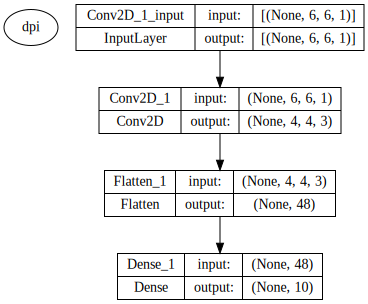

In [20]:
SVG(model_to_dot(model,show_shapes=True,dpi=None).create(prog='dot', format='svg'))

## 組み立てたモデルを学習データで訓練する

## 早期終了も設定する

In [21]:
# 早期終了用の設定のオブジェクトを用意する
earlyStopping = callbacks.EarlyStopping(monitor='val_loss', # 損失を監視
                                        patience=5)         # epoch5つ分様子を見る

## 学習方法を指定して学習モデルをコンパイルする

In [23]:
model.compile(loss='mean_squared_error', #損失を 平均(mean)二乗(Squared)誤差(Error)で計算
              optimizer='sgd') # パラメータの重みをSDGで最適化する

## 学習方法を指定した学習モデルを訓練する

In [24]:
model.fit(x_train,y_train,# 学習データと答えデータ
          batch_size=32, # 32個ずつまとめて学習(=バッチ)してから重みを調整する)
          epochs=10, # バッチが終わったら重みを調整して学習しなおす
          callbacks=[earlyStopping], # エポックの中で呼ぶcallbacks処理のリストに早期終了を追加
          validation_split=0.2 # 学習データのうち2割を、学習中の自己評価検証に使う
)

Epoch 1/10
3/3 [==============================] - 1s 88ms/step - loss: 0.0927 - val_loss: 0.0906
Epoch 2/10
3/3 [==============================] - 0s 27ms/step - loss: 0.0927 - val_loss: 0.0906
Epoch 3/10
3/3 [==============================] - 0s 18ms/step - loss: 0.0927 - val_loss: 0.0906
Epoch 4/10
3/3 [==============================] - 0s 17ms/step - loss: 0.0927 - val_loss: 0.0906
Epoch 5/10
3/3 [==============================] - 0s 15ms/step - loss: 0.0926 - val_loss: 0.0906
Epoch 6/10
3/3 [==============================] - 0s 15ms/step - loss: 0.0926 - val_loss: 0.0906
Epoch 7/10
3/3 [==============================] - 0s 16ms/step - loss: 0.0926 - val_loss: 0.0906
Epoch 8/10
3/3 [==============================] - 0s 17ms/step - loss: 0.0926 - val_loss: 0.0906
Epoch 9/10
3/3 [==============================] - 0s 18ms/step - loss: 0.0926 - val_loss: 0.0906
Epoch 10/10
3/3 [==============================] - 0s 19ms/step - loss: 0.0926 - val_loss: 0.0906
